In [0]:
# Reverse engineering BSM formula using ANN
import numpy as np
import pandas as pd
import scipy.stats as si


In [0]:
def N(x):
  return si.norm.cdf(x, 0.0, 1.0)


In [0]:
def euro_vanilla(S, K, T, r, d, sigma, call_option = 1):

  
    F = S*np.exp((r-d)*T)
    B = np.exp(-r*T)
    d1 = (np.log(F / K) + 0.5 * sigma ** 2 * T) / (sigma * np.sqrt(T))
    d2 = (np.log(F / K) - 0.5 * sigma ** 2 * T) / (sigma * np.sqrt(T))

    if call_option == 1:
        result = (F * N(d1) - K * N(d2))
    if call_option == 0:
        result = (K * N(-d2) - F * N(-d1))
    return B*result  

np.random.seed(42)


In [8]:
N(1.39)

0.917735561322331

In [0]:
def euro_vanilla(S, K, T, r, d, sigma, call_option = 1):

    # S: spot price
    # K: strike price
    # T: time to maturity (unit: year)
    # r: interest rate per year
    # d: dividend rate per year
    # sigma: volatility of underlying asset per year
    # call_option: call = 1, put = 0
  
    F = S*np.exp((r-d)*T)
    B = np.exp(-r*T)
    d1 = (np.log(F / K) + 0.5 * sigma ** 2 * T) / (sigma * np.sqrt(T))
    d2 = (np.log(F / K) - 0.5 * sigma ** 2 * T) / (sigma * np.sqrt(T))

    if call_option == 1:
        result = (F * N(d1) - K * N(d2))
    if call_option == 0:
        result = (K * N(-d2) - F * N(-d1))
    return B*result  


In [0]:
np.random.seed(42)

In [14]:
euro_vanilla(30,50,1,0.015,0.01,0.3,call_option=0)

19.769347016707336

In [0]:

draws = 10**3
S = np.random.rand(draws) * 100.
K = (np.random.randint(50, 150, draws) * .01) * S
T = np.random.randint(10, 300, draws) / 100.
r = np.random.randint(1, 1000, draws) / 10000.
d = np.random.randint(1, 1000, draws) / 10000.
sigma = np.random.random(draws)
opt_type = np.random.choice([1,  0], draws)


In [15]:
np.random.rand(5)

array([0.58268615, 0.12410737, 0.12141491, 0.72113236, 0.18378467])

In [16]:
np.random.rand(5)*100

array([32.83854996, 48.72120069,  2.47648776, 24.8819027 , 40.78896085])

In [18]:
np.random.randint(50, 150, 7)

array([ 85, 142, 125,  63, 103, 134, 135])

In [19]:
r

array([0.0835, 0.0566, 0.0906, 0.081 , 0.032 , 0.0126, 0.0277, 0.0976,
       0.0204, 0.0194, 0.0681, 0.0664, 0.0547, 0.0696, 0.0286, 0.0057,
       0.0734, 0.0303, 0.0163, 0.0019, 0.037 , 0.0264, 0.0794, 0.0113,
       0.0488, 0.0327, 0.0542, 0.0647, 0.0579, 0.0065, 0.0292, 0.0025,
       0.0549, 0.0001, 0.0911, 0.0549, 0.0141, 0.0744, 0.0648, 0.0901,
       0.0188, 0.0128, 0.0201, 0.0127, 0.0257, 0.0676, 0.0547, 0.0194,
       0.0703, 0.0104, 0.0535, 0.0265, 0.0802, 0.0942, 0.0974, 0.0384,
       0.026 , 0.0414, 0.0991, 0.0358, 0.0075, 0.0355, 0.0584, 0.0771,
       0.091 , 0.0188, 0.0973, 0.0685, 0.0992, 0.029 , 0.0045, 0.0573,
       0.0083, 0.0123, 0.0358, 0.0528, 0.0066, 0.0936, 0.0657, 0.0375,
       0.0162, 0.0746, 0.038 , 0.0656, 0.0358, 0.0188, 0.0322, 0.045 ,
       0.0474, 0.0013, 0.0184, 0.0111, 0.0927, 0.0508, 0.029 , 0.0295,
       0.0451, 0.0904, 0.0215, 0.0974, 0.0632, 0.0894, 0.0567, 0.0027,
       0.063 , 0.0733, 0.0231, 0.0565, 0.0807, 0.0321, 0.0913, 0.0233,
      

In [21]:
# generate option prices
opt_price = []
for i in range(draws):
    p = euro_vanilla(S[i], K[i], T[i], r[i], d[i], sigma[i], opt_type[i])
    opt_price.append(p)
    if (i % 500) == 0:
        print('Generated {} Options'.format(i))

# create a dataframe
options = pd.DataFrame({'S': S,
                        'K': K,
                        'T': T,
                        'r': r,
                        'd': d,
                        'sigma': sigma,
                        'type': opt_type,
                        'price': opt_price})


Generated 0 Options
Generated 500 Options


In [22]:
options.head()

,S,K,T,r,d,sigma,type,price
0,37.454012,35.955851,2.96,0.0835,0.0084,0.353697,1,12.634421
1,95.071431,57.993573,2.17,0.0566,0.0694,0.302479,0,2.161922
2,73.199394,81.251328,1.15,0.0906,0.0391,0.975373,1,26.976851
3,59.865848,77.226944,1.67,0.0810,0.0591,0.170115,1,1.120671
4,15.601864,21.374554,1.30,0.0320,0.0215,0.898238,1,4.587655


In [0]:
options = pd.concat([options, pd.get_dummies(options['type'])], axis=1)
options.drop('type', inplace=True, axis=1)


In [24]:
options.head()

,S,K,T,r,d,sigma,price,0,1
0,37.454012,35.955851,2.96,0.0835,0.0084,0.353697,12.634421,0,1
1,95.071431,57.993573,2.17,0.0566,0.0694,0.302479,2.161922,1,0
2,73.199394,81.251328,1.15,0.0906,0.0391,0.975373,26.976851,0,1
3,59.865848,77.226944,1.67,0.0810,0.0591,0.170115,1.120671,0,1
4,15.601864,21.374554,1.30,0.0320,0.0215,0.898238,4.587655,0,1


In [0]:
X, y = options[options.columns.difference(['price'])], options['price']

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [27]:
# Use a linear stack of layers
from keras.models import Sequential 
# Implement output = activation(dot(input, kernel) + bias)
from keras.layers import Dense, Dropout 

model = Sequential()
model.add(Dense(2048, input_dim=X.shape[-1], activation='relu'))
#model.add(Dropout(.25))
model.add(Dense(2048, activation='relu'))
#model.add(Dropout(.25))
#model.add(Dense(2048, activation='relu'))
#model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, verbose = 0, validation_split = .1) #validation_split=.1, verbose=0, batch_size=256) # callbacks=get_keras_callbacks()


Using TensorFlow backend.
W0704 05:57:09.261144 140378969003904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 05:57:09.277914 140378969003904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 05:57:09.281623 140378969003904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 05:57:09.324812 140378969003904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 05:57:09.451569 14037896

In [28]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              18432     
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2049      
Total params: 4,216,833
Trainable params: 4,216,833
Non-trainable params: 0
_________________________________________________________________


In [29]:
insampleY = model.predict(X_train)
outsampleY = model.predict(X_test)
error_insample = y_train - insampleY[:,0]
error_outsample = y_test - outsampleY[:,0]

mse_insample = np.sum(error_insample**2)/(len(insampleY))
mse_outsample = np.sum(error_outsample**2)/(len(outsampleY))

print('mse_insample:', mse_insample)
print('mse_outsample:', mse_outsample)


mse_insample: 5.443720499991588
mse_outsample: 5.781018199913158


dict_keys(['val_loss', 'loss'])


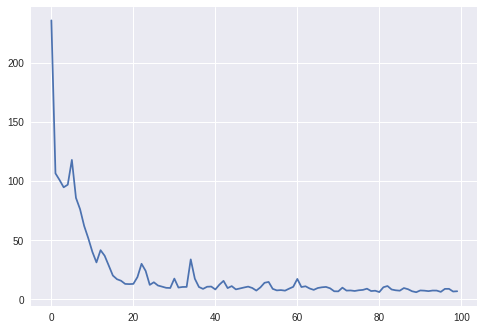

Errors for outsample:
count    100.000000
mean       0.290357
std        2.398802
min       -6.098939
25%       -0.725440
50%       -0.170588
75%        1.046671
max        7.471651
Name: price, dtype: float64


Errors for insample:
count    900.000000
mean      -0.015113
std        2.334427
min      -10.485551
25%       -1.050176
50%       -0.081912
75%        0.937296
max       10.881739
Name: price, dtype: float64


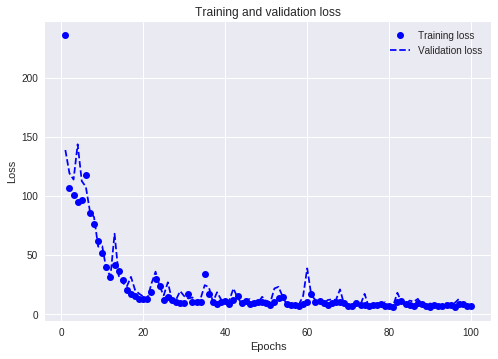

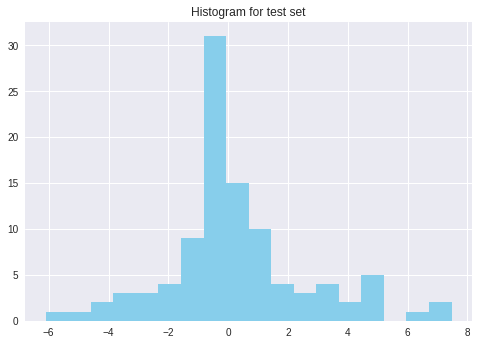

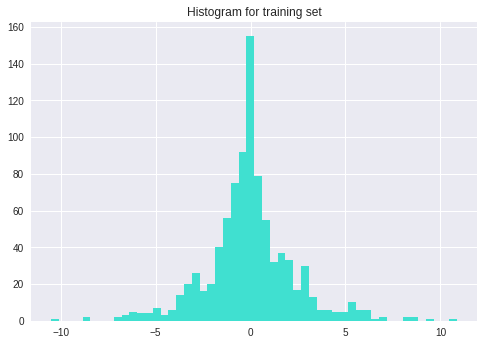

In [30]:
print(history.history.keys())
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')
loss = history.history['loss']

#epochs = range(1, len(acc) + 1)
plt.plot(loss)

plt.show()


#graph
#train_mae = history.history['mean_absolute_error']
train_loss = history.history['loss']
#val_mae = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print("Errors for outsample:")
print(error_outsample.describe())
print('\n')
print("Errors for insample:")
print(error_insample.describe())

plt.figure()
plt.hist(error_outsample, bins='auto', color = 'skyblue')
plt.title("Histogram for test set")
plt.show()

plt.figure()
plt.hist(error_insample, bins='auto', color = 'turquoise')
plt.title("Histogram for training set")
plt.show()


